# Pymaceuticals Inc.
---

### Analysis

- While I was not able to complete a number of the analyses required for this assignment, I was able to establish a summary statistics table and use that dataframe to create a bar and pie chart as well as the line and scatter plots. Through the employment of these data visualization techniques, we are able to glimpse into the overall impact of the various drug regimen among the mice population in regards to their SCC tumors. With the primary focus on Capomulin, we can see that there is a sizeable correlation between the regression of tumor sizes with the continuous application of Capomulin over the course of the 45 day treatment. This is a significant finding for this study but, unfortunately, we are unable to determine the comparative rates of success with the other drug regimen. 
 

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mousestudy_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mousestudy_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [138]:
# Checking the number of mice.
unique_mouse_ids = mousestudy_df['Mouse ID'].nunique()
unique_mouse_ids

249

In [139]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ids = mousestudy_df[mousestudy_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_ids['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [140]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_ids

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [156]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mousestudy_df[mousestudy_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [157]:
# Checking the number of mice in the clean DataFrame.
unique_clean_ids = clean_df['Mouse ID'].nunique()
unique_clean_ids

248

## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_drugs_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
grouped_drugs_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
grouped_drugs_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
grouped_drugs_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
grouped_drugs_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.
Drugs_df = pd.DataFrame({"Mean": grouped_drugs_mean,
                         "Median": grouped_drugs_median,
                         "Variance": grouped_drugs_var,
                         "Standard Deviation": grouped_drugs_std,
                         "SEM": grouped_drugs_sem})

Drugs_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [160]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drugs_grouped_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
drugs_grouped_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

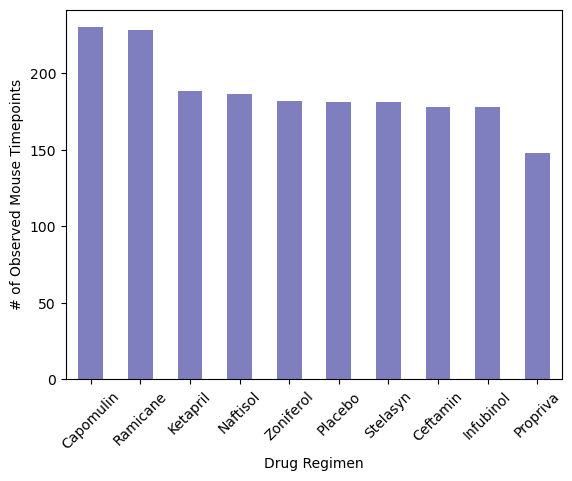

In [200]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df.groupby('Drug Regimen').size()
sorted_regimen_counts = regimen_counts.sort_values(ascending=False)
sorted_regimen_counts.plot(kind='bar',color='navy', alpha=0.5, align="center")

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=45)

plt.show()

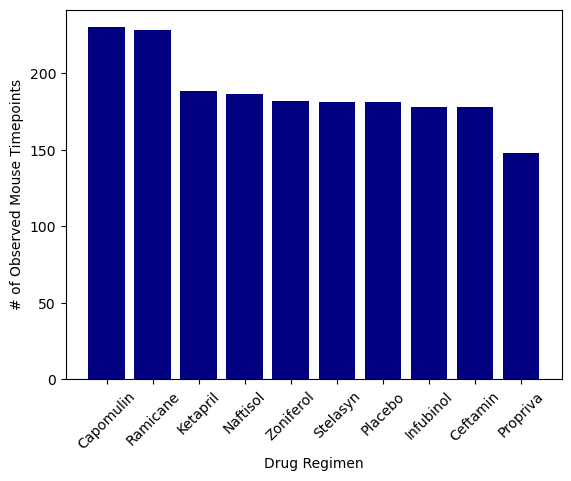

In [198]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts()

plt.bar(regimen_counts.index, regimen_counts.values, color='navy')

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

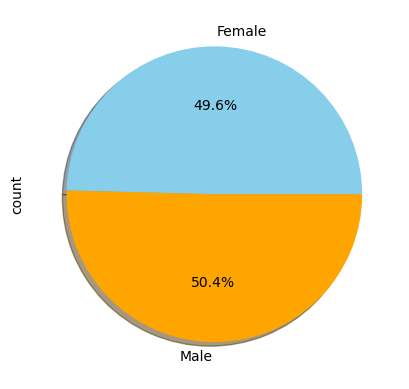

In [199]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study


# Get the unique mice with their gender
unique_mice_gender = clean_df.groupby('Sex')['Mouse ID'].nunique()

# Make the pie chart
unique_mice_gender.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], shadow=True)
plt.ylabel('count') 
plt.show()

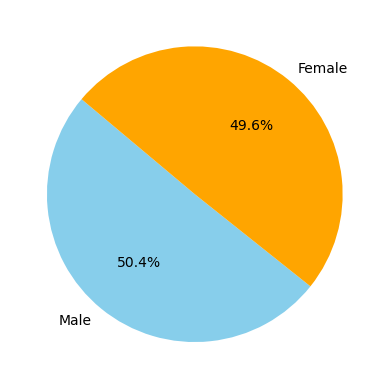

In [205]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = clean_df[['Mouse ID', 'Sex']].drop_duplicates()
unique_mice_counts = unique_mice_gender['Sex'].value_counts()

# Step 3: Plot the pie chart using pyplot

plt.pie(unique_mice_counts, 
        labels=unique_mice_counts.index,
        autopct='%1.1f%%',
        colors=['skyblue', 'orange'],
        startangle=140)

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


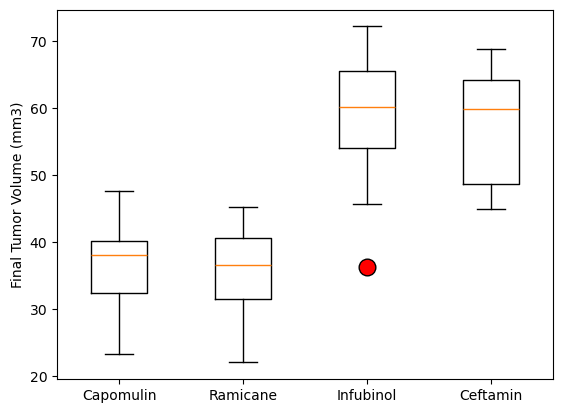

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

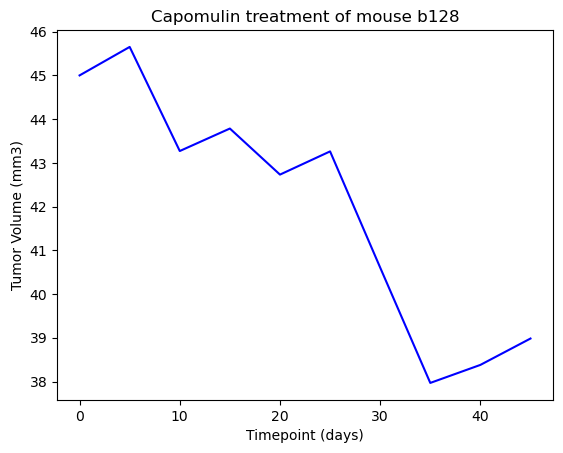

In [211]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'b128'

mouse_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse b128')
plt.show()

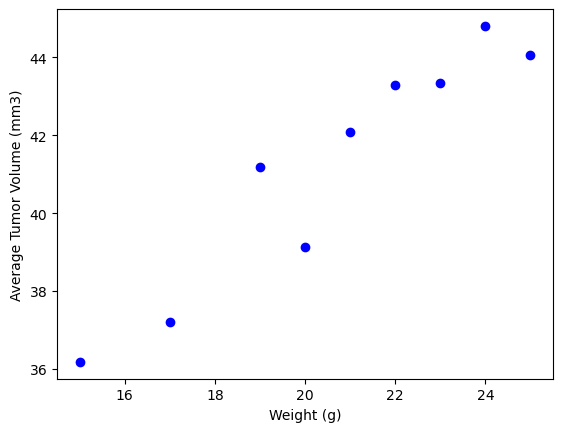

In [217]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_regimen.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


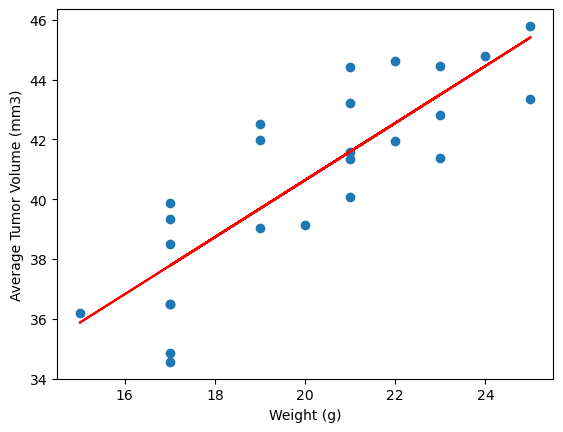

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
